# Homework set 6

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 12, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Marcel van de Lagemaat - 10886699 <br>
Anton Andersen - 14718758 

----------------

# Exercise 1 (4.5 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq, norm
import sympy as sp
x_, y_, t_ = sp.symbols('x y t')

data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$.

Plot the observed and modeled data and make a separate plot of the residuals.

The result of the optimization is for initial population: 0.0999999761389271 and growth rate 1.8914302417517685


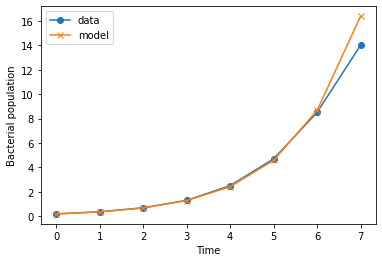

The 2-norm of the residuals over the iterations:


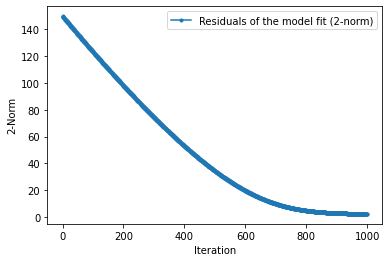

In [299]:
def gradient(x, r, t):
    x_1 = [x_ ** t_ for x_, t_ in zip(x, t)]
    x_2 = [x_ * t_ * r ** (t_ - 1) for x_, t_ in zip(x, t)]
    return np.vstack([x_1, x_2])

def function(t, x, r):
    """ INPUT: t - time, x_1 - current time population, x_2 - growth rate 
        OUTPUT: Returns the population value for the following period. """
    return x * r ** t

def gauss_newton(data, x_0, K):
    """ INPUT: data - observed data, x - initial guess for the parameters
        OUTPUT:  The estimate for the parameters of the model. """
    residual_norm = np.zeros([K])
    for k in range(K):
        model_values = np.array([function(t, x_0[0], x_0[1]) for t in range(1, len(data) + 1)]) # evaluates the model with the parameters
        r = (model_values - data) # calculates the negative of the residual vector
        J = gradient(model_values, x_0[1], range(1, len(data) + 1)) # This one also needs the updated values
        s = lstsq(np.array(J.T), -np.array(r).T, rcond = None)[0] # Then the lstsq solution for the jacobian and the negative of r.
        x_0 = x_0 + s # This one updates the parameters
        residual_norm[k] = norm(r, 2) # Add the 2-norm to the array.
    return x_0, residual_norm

initial = np.array([0.1, 2.5])
data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]
params, residuals = gauss_newton(np.array(data), initial, 1000)

print(f'The result of the optimization is for initial population: {params[0]} and growth rate {params[1]}')
plt.plot(data, label = 'data', marker='o')
plt.plot([function(t, params[0], params[1]) for t in range(1, len(data) + 1)], label = 'model', marker='x')
plt.legend(), plt.ylabel('Bacterial population'), plt.xlabel('Time')
plt.show()
# Then one plot for the residuals
print(f'The 2-norm of the residuals over the iterations:')
plt.plot(residuals, label = 'Residuals of the model fit (2-norm)', marker='o', markersize = 3)
plt.ylabel('2-Norm'), plt.xlabel('Iteration')
plt.legend()
plt.show()

# (b) 
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( f_i(x) - y_i) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| F(x) - Y \|^2
$$
with $F(x) = T f(x)$  , $Y = T y$, where $T$ is the diagonal matrix with $\frac{1}{\sigma_i}$ on the diagonal. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0 = x_1$ and $r = x_2$.
Plot the observed and modeled data and make a separate plot of the residuals.

Are the results different from those of part (a)? Discuss and explain the differences.


The result of the optimization is for initial population: 0.09999990996455657 and growth rate 1.89150571976983


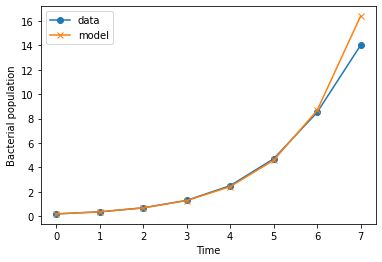

The 2-norm of the residuals over the iterations:


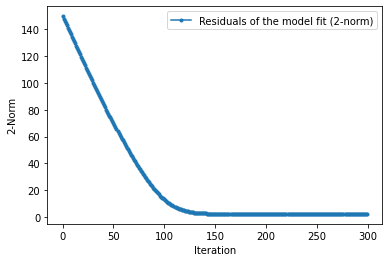

In [296]:
def weighted_gauss_newton(data, x_0, K):
    """ INPUT: data - observed data, x - initial guess for the parameters
        OUTPUT:  The weighted estimate for the parameters of the model. """
    residual_norm = np.zeros([K])
    w = 1 / ((0.05 * data) ** 2)
    for k in range(K):
        model_values = np.array([function(t, x_0[0], x_0[1]) for t in range(1, len(data) + 1)]) # evaluates the model with the parameters
        r = (model_values - data) # calcualtes the negative of the residual vector
        J = gradient(model_values, x_0[1], range(1, len(data) + 1)) # This one also needs the updated values
        s = lstsq(np.array(J.T), -np.array(w * r).T, rcond = None)[0] # Then the lstsq solution for the jacobian and the negative of r.
        x_0 = x_0 + s # This one updates the parameters
        residual_norm[k] = norm(r, 2) # Add the 2-norm to the array.

    return x_0, residual_norm

initial = np.array([0.1, 2.5])
data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]
params_w, residuals_w = weighted_gauss_newton(np.array(data), initial, 300)
print(f'The result of the optimization is for initial population: {params_w[0]} and growth rate {params_w[1]}')
plt.plot(data, label = 'data', marker='o')
plt.plot([function(t, params_w[0], params_w[1]) for t in range(1, len(data) + 1)], label = 'model', marker='x')
plt.legend(), plt.ylabel('Bacterial population'), plt.xlabel('Time')
plt.show()
# Then one plot for the residuals
print(f'The 2-norm of the residuals over the iterations:')
plt.plot(residuals_w, label = 'Residuals of the model fit (2-norm)', marker = 'o', markersize = 3)
plt.ylabel('2-Norm'), plt.xlabel('Iteration')
plt.legend()
plt.show()

The difference between the results in questions 1a and 1b is apparent in the plot of the residuals. In the weighted least squares, the residuals converge much faster than for the Gauss-Newton method in 1a. Otherwise they seem to converge on the same parameter values. The reason for the faster convergence might be due to the larger relative weight placed on the large values, so in this case where t is larger (since the values y grow with time). 

----------------------
# Exercise 2 (4.5 points)



# (a) 
Let $f(x) = 1/x^2$ and $a=10^{-3}$ and $b=1$. Make a plot of the graph of $f$ on $[a,b]$. 

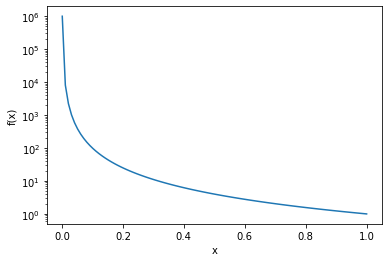

In [179]:
# Global variable for part (c)
xVals = np.array([])

# Function f(x)
def f(x):
    global xVals
    xVals = np.append(xVals, x)
    return 1 / (x ** 2)

# Define a, b, and interval between a and b
a, b = 10**-3, 1
x = np.linspace(a, b, 100)

# Plot f(x)
fig, ax = plt.subplots()
ax.semilogy(x, f(x))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

# (b) 
Use scipy.integrate.quad to compute $\int_a^b f(x) \, dx$ with an absolute error less than 1e-4. Compare with the true value of the integral.

In [180]:
from scipy.integrate import quad
from IPython.display import display, Latex

integ = quad(f, a, b, epsabs=1e-4)
display(Latex(f'$\int_a^b f(x) \, dx = {integ[0]}$'))


<IPython.core.display.Latex object>

Where the true value of the integral is:

$\int_{10^{-3}}^1 f(x) \, dx = [- \frac{1}{x} + C]_{10^{-3}}^1 = (-\frac{1}{1} + C) - (\frac{1}{10^{-3}} + C) = -1 + 1000 = 999$ 

This means that scipy.integrate.quad introduces numerical error of about $10^{-11}$


# (c)
scipy.integrate.quad is an adaptive integration routine (book section 8.3.6), that automatically chooses an appropriate subdivision of the interval in subintervals. Therefore in some parts of the interval $[0,1]$ the function $f$ will be evaluated more often than in other parts. Divide the interval $[0,1]$ into bins $B_i = [h * (i-1), h*i]$, with $h=0.01$. For each bin $B_i$, count the number of times $f(x)$ is evaluated with $x$ in $B_i$. Make a histogram plot of these data. In which region is there a large number of function evaluations? Can you explain this, taking into account how $f$ is defined?

Hint: To know for which $x$ the function $f$ is evaluated, you can keep a global array `xVals` in which you store all values of $x$ for which the function $f$ is called. You can use a numpy array and use numpy.append to add new values to `xVals`.


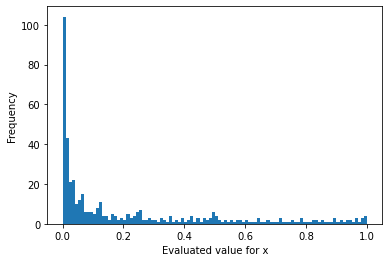

In [181]:
# Create the bins 
bins = np.arange(0, 1.01, 0.01)

# Plot histogram 
fig, ax = plt.subplots()
ax.hist(xVals, bins)
ax.set_xlabel('Evaluated value for x')
ax.set_ylabel('Frequency')
plt.show()

We can see that the function is evaluated significantly more close to $x = 0$. Since this is where the function has its' asymptote, i.e. it is not defined for $x=0$, the function value for $x$ closer to $0$ will give increasingly larger values that impact the total area more than for example around $x=0.5$. Therefore it is necessary to evaluate more points that are close to $0$ in calculating the area, since missing a small interval can mean a big difference in the outcome of calculating the area.